Epoch    0 | Loss: 2.3885 | Accuracy: 0.336
Epoch  100 | Loss: 0.5690 | Accuracy: 0.986
Epoch  200 | Loss: 0.3803 | Accuracy: 0.982
Epoch  300 | Loss: 0.2756 | Accuracy: 0.984
Epoch  400 | Loss: 0.2140 | Accuracy: 0.986
Epoch  500 | Loss: 0.1742 | Accuracy: 0.988
Epoch  600 | Loss: 0.1465 | Accuracy: 0.988
Epoch  700 | Loss: 0.1261 | Accuracy: 0.994
Epoch  800 | Loss: 0.1104 | Accuracy: 0.994
Epoch  900 | Loss: 0.0980 | Accuracy: 0.998


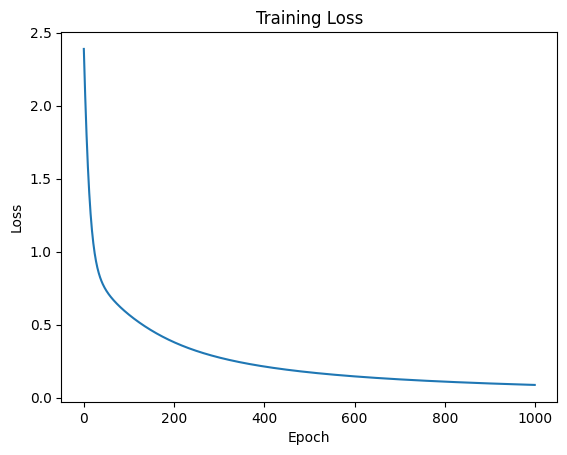

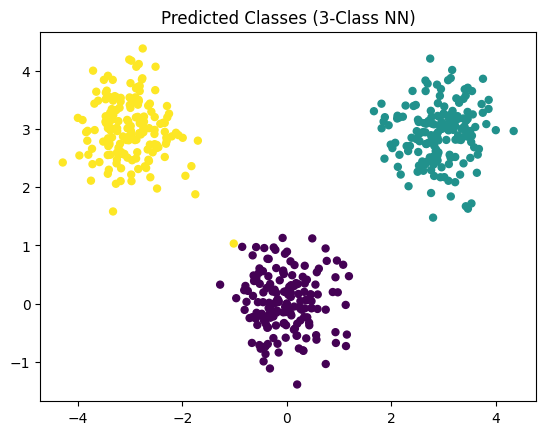

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 500
K = 3
X = np.zeros((N, 2))
Y = np.zeros((N, K))

centers = np.array([[0, 0], [3, 3], [-3, 3]])
for i in range(K):
    ix = range(i * (N // K), (i + 1) * (N // K))
    X[ix] = np.random.randn(len(ix), 2) * 0.5 + centers[i]
    Y[ix, i] = 1

class NeuralNetwork:
    def __init__(self):
        input_neurons = 2
        hidden1_neurons = 10
        hidden2_neurons = 8
        output_neurons = 3

        self.lr = 0.05


        self.W_H1 = np.random.randn(input_neurons, hidden1_neurons)
        self.W_H2 = np.random.randn(hidden1_neurons, hidden2_neurons)
        self.W_O = np.random.randn(hidden2_neurons, output_neurons)


    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.z1 = np.dot(X, self.W_H1)
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W_H2)
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W_O)
        self.output = self.softmax(self.z3)

        return self.output


    def backPropagation(self, X, Y, pred):
        N = X.shape[0]
        output_error = (Y - pred) / N

        dW_O = self.a2.T.dot(output_error)
        hidden2_error = output_error.dot(self.W_O.T) * self.sigmoid(self.a2, der=True)
        dW_H2 = self.a1.T.dot(hidden2_error)
        hidden1_error = hidden2_error.dot(self.W_H2.T) * self.sigmoid(self.a1, der=True)
        dW_H1 = X.T.dot(hidden1_error)

        self.W_O += self.lr * dW_O
        self.W_H2 += self.lr * dW_H2
        self.W_H1 += self.lr * dW_H1

    def train(self, X, Y, epochs=1000):
        losses = []
        for i in range(epochs):
            pred = self.feedForward(X)
            loss = -np.mean(np.sum(Y * np.log(pred + 1e-12), axis=1))  # cross-entropy
            losses.append(loss)
            self.backPropagation(X, Y, pred)

            if i % 100 == 0:
                acc = self.accuracy(X, Y)
                print(f"Epoch {i:4d} | Loss: {loss:.4f} | Accuracy: {acc:.3f}")
        return losses

    def predict(self, X):
        probs = self.feedForward(X)
        return np.argmax(probs, axis=1)

    def accuracy(self, X, Y):
        y_true = np.argmax(Y, axis=1)
        y_pred = self.predict(X)
        return np.mean(y_true == y_pred)

nn = NeuralNetwork()
losses = nn.train(X, Y, epochs=1000)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


y_pred = nn.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=25, cmap="viridis")
plt.title("Predicted Classes (3-Class NN)")
plt.show()
